In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier

In [45]:
df = pd.read_csv("./datasets/winequality-red.csv")

In [46]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [47]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 데이터는 전부 float or int형 값이며 null값이 없으므로 특성공학, scaling만 진행하면됨

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.drop("quality", axis=1), df["quality"],train_size=0.8)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

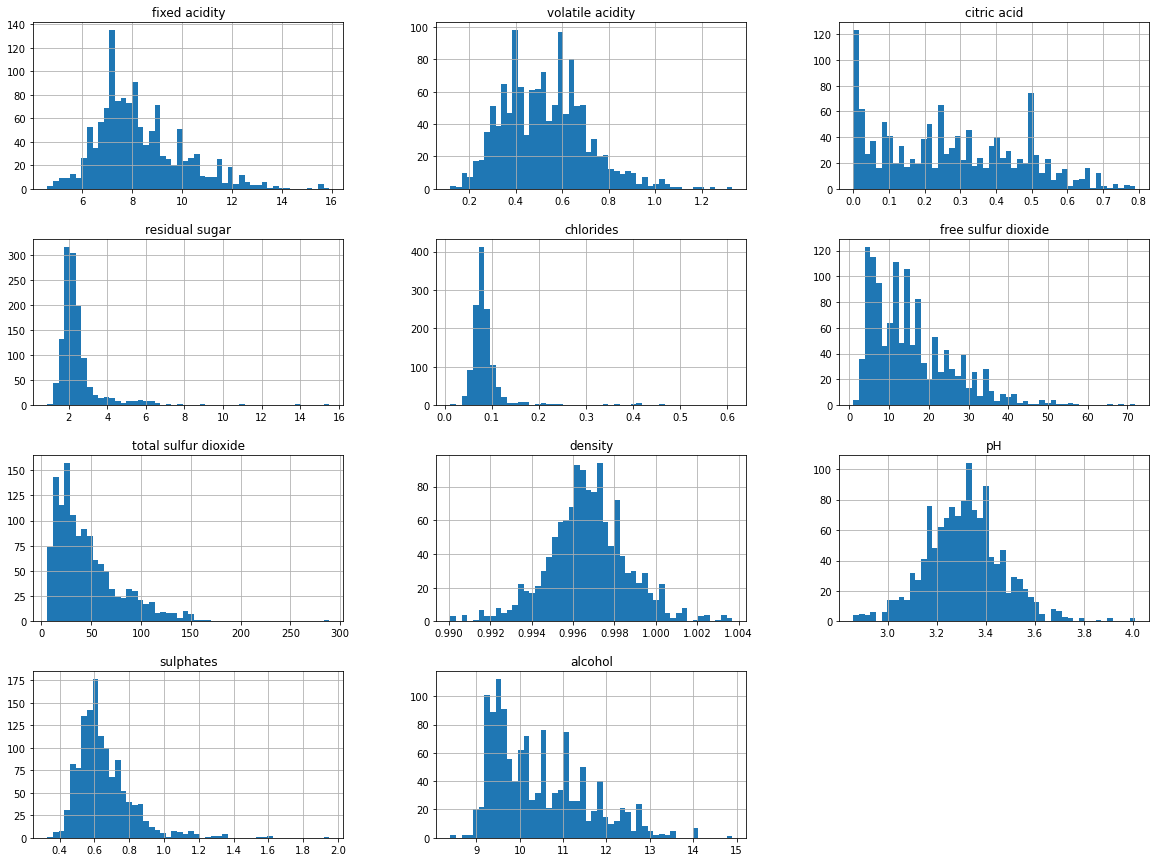

In [50]:
X_train.hist(bins=50, figsize=(20,15))

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC as SVC_, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [68]:
rf = RandomForestClassifier()

In [76]:
rf.fit(X_train, y_train)

In [84]:
cross_val_score(rf, X_train,y_train, cv=10, scoring="accuracy")

C:\Users\hjhhi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


array([0.640625  , 0.6875    , 0.671875  , 0.6484375 , 0.6640625 ,
       0.671875  , 0.640625  , 0.7421875 , 0.6875    , 0.67716535])

In [91]:
SVC = SVC_()
random_forest = RandomForestClassifier()
decision_tree = DecisionTreeClassifier()
SGD = SGDClassifier()
logreg = LogisticRegression(max_iter=500)
models = [SVC, random_forest, decision_tree, logreg]
model_names = ["SVC","Randomforest","DecisionTree","Logisticregression"]

In [94]:
svcParams = {"C": np.arange(6,10), 
              "kernel": ["linear","rbf"],
              "gamma": [0.5, 0.2, 0.1]}
dtParams = {"max_features": ["auto", "sqrt", "log2"],
             "min_samples_split": np.arange(3,10), 
             "min_samples_leaf":np.arange(3,10)}
rfParams = {"criterion":["gini","entropy"],
             "n_estimators":[10, 15, 20, 25],
             "min_samples_leaf":[1, 2, 3],
             "min_samples_split":np.arange(3,7), 
             "max_features":["sqrt", "auto", "log2"]}
logParams = {"penalty": ["l1","l2","elasticnet"],
            "C": [10,1,0.1,0.01]}

In [111]:
def tuneHyperparameters(model, params):

    gridSearch = GridSearchCV(model, params, verbose=0, cv=10, scoring="neg_mean_squared_error", n_jobs = 4)
    gridSearch.fit(X_train, y_train)
    bestParams, bestScore = gridSearch.best_params_, gridSearch.best_score_
    return bestScore, bestParams

In [112]:
model_names_to_tune = ["SVC","Randomforest","DecisionTree","Logisticregression"]
model_to_tune = [SVC, random_forest, decision_tree, logreg]
model_params=[svcParams, rfParams, dtParams, logParams]
bestscores = list(map(tuneHyperparameters, model_to_tune, model_params))

C:\Users\hjhhi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\hjhhi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\hjhhi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\hjhhi\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\hjhhi\Anaconda3\lib\site-packag

In [113]:
bestscores

[(-0.53158218503937, {'C': 6, 'gamma': 0.5, 'kernel': 'linear'}),
 (-0.4393208661417323,
  {'criterion': 'entropy',
   'max_features': 'auto',
   'min_samples_leaf': 1,
   'min_samples_split': 3,
   'n_estimators': 20}),
 (-0.5941560039370078,
  {'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 6}),
 (-0.512869094488189, {'C': 1, 'penalty': 'l2'})]

In [141]:
best_model = RandomForestClassifier(criterion="entropy",max_features="auto",  min_samples_leaf=1, min_samples_split=3, n_estimators=20)

In [145]:
cv_score = cross_val_score(best_model, X_train, y_train, scoring="neg_mean_squared_error")

In [146]:
rmse_scores=np.sqrt(-cv_score)

In [147]:
rmse_scores.mean()

0.6807872648496969

In [148]:
cv_score

array([-0.4609375 , -0.4609375 , -0.4921875 , -0.46484375, -0.43921569])

In [149]:
np.sqrt(0.5)

0.7071067811865476